# Franchises Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import franchises dataframe
franchises=pd.read_csv('franchises.csv')

In [2]:
franchises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                382 non-null    object 
 1   account_id                  382 non-null    int64  
 2   Year                        382 non-null    int64  
 3   incorporated_country        382 non-null    object 
 4   Primary activity            382 non-null    object 
 5   Primary sector              382 non-null    object 
 6   Market_Cap_USD              331 non-null    float64
 7   Third_party_verification    382 non-null    object 
 8   Revenue_USD                 331 non-null    float64
 9   ebitda_USD                  331 non-null    float64
 10  grossProfit_USD             331 non-null    float64
 11  netIncome_USD               331 non-null    float64
 12  cashAndCashEquivalents_USD  331 non-null    float64
 13  shortTermInvestments_USD    331 non

In [3]:
franchises.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,Intercontinental Hotels Group,22499,2018,United Kingdom,Hotels & lodging,"Bars, hotels & restaurants",7.765812e+09,Third-party verification or assurance process ...,4.337000e+09,8.000000e+08,...,363000000.0,3.753000e+09,4.830000e+09,364000000.0,2.249000e+09,-1.077000e+09,Franchises,2631574.96,1466765.00,4072324
1,Marks and Spencer Group plc,11328,2018,United Kingdom,"Supermarkets, food & drugstores",Convenience retail,4.877304e+09,Third-party verification or assurance process ...,1.317917e+10,1.089406e+09,...,36195000.0,1.124077e+10,8.104886e+09,209931000.0,5.443093e+09,3.135884e+09,Franchises,150000.00,218956.75,4072324
2,Gap Inc.,7060,2018,USA,Apparel stores,Discretionary retail,9.814560e+09,Third-party verification or assurance process ...,1.658000e+10,1.879000e+09,...,338000000.0,8.049000e+09,4.496000e+09,288000000.0,1.249000e+09,3.553000e+09,Franchises,40652.00,216821.25,4072324
3,General Mills Inc.,7156,2018,USA,Other food processing,Food & beverage processing,2.337958e+10,Third-party verification or assurance process ...,1.574040e+10,3.459300e+09,...,499600000.0,3.062400e+10,2.335540e+10,499600000.0,1.581860e+10,7.268600e+09,Franchises,9086.00,645194.75,4072324
4,"Hilton Worldwide, Inc.",8348,2018,USA,Hotels & lodging,"Bars, hotels & restaurants",2.103740e+10,Third-party verification or assurance process ...,8.906000e+09,1.785000e+09,...,0.0,1.399500e+10,1.343700e+10,0.0,7.282000e+09,5.580000e+08,Franchises,3473170.00,1390431.75,4072324


In [4]:
# Rename features
franchises = franchises.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
franchises = franchises.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

franchises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                382 non-null    object 
 1   account_id                  382 non-null    int64  
 2   Year                        382 non-null    int64  
 3   Countries                   382 non-null    object 
 4   Primary_activity            382 non-null    object 
 5   Primary_sector              382 non-null    object 
 6   Market_Cap_USD              331 non-null    float64
 7   Revenue_USD                 331 non-null    float64
 8   ebitda_USD                  331 non-null    float64
 9   grossProfit_USD             331 non-null    float64
 10  netIncome_USD               331 non-null    float64
 11  cashAndCashEquivalents_USD  331 non-null    float64
 12  shortTermInvestments_USD    331 non-null    float64
 13  longTermInvestments_USD     331 non

In [5]:
# Looking at missing data
print(franchises.isnull().mean().sort_values(ascending=False).round(3) * 100)

cashAndCashEquivalents_USD    13.4
totalLiabilities_USD          13.4
totalEquity_USD               13.4
totalDebt_USD                 13.4
Market_Cap_USD                13.4
Revenue_USD                   13.4
ebitda_USD                    13.4
grossProfit_USD               13.4
netIncome_USD                 13.4
totalInvestments_USD          13.4
shortTermInvestments_USD      13.4
longTermInvestments_USD       13.4
totalAssets_USD               13.4
scope_1_2_emissions_amount     0.0
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


## PCA for Franchises Dataset

- Numeric features are selected, excluding IDs, categorical columns, and the target.
- Signed-log transformation is applied for stability.
- Rows with missing values are removed; indices are tracked.
- Data is standardized, then PCA is fitted.
- Principal components are named `PC1`, `PC2`, etc., and merged back to the original DataFrame for valid rows.
- Scree plot and cumulative explained variance plot are provided.
- Prints cumulative variance explained by each component.
- Result: `franchises_with_pcs` includes principal components for downstream modeling.

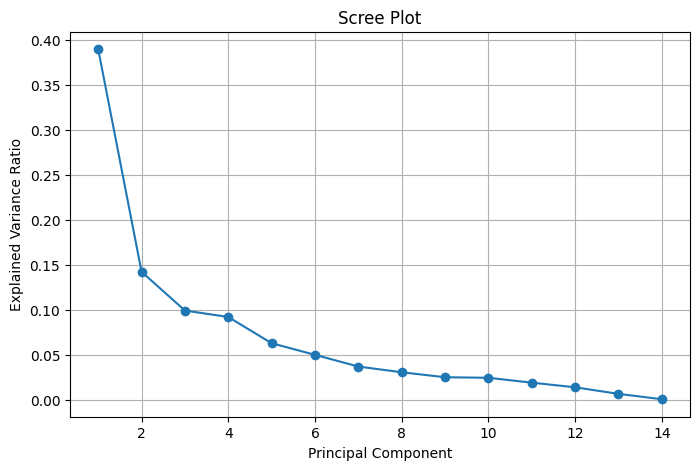

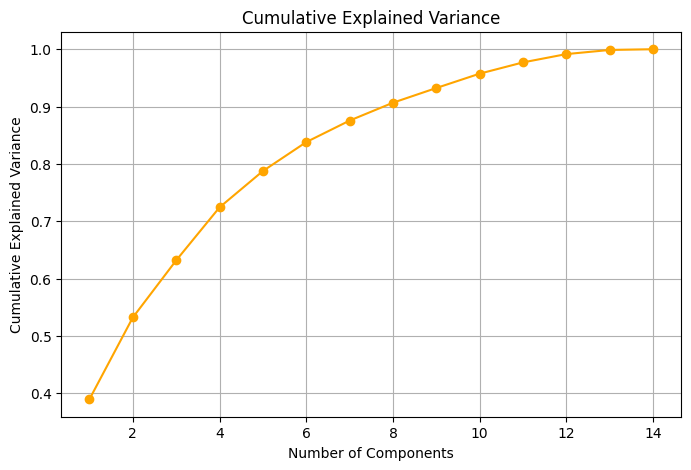

Cumulative variance explained by each additional principal component:
  PC1: 0.3894
  PC2: 0.5320
  PC3: 0.6316
  PC4: 0.7241
  PC5: 0.7875
  PC6: 0.8380
  PC7: 0.8755
  PC8: 0.9067
  PC9: 0.9323
  PC10: 0.9574
  PC11: 0.9770
  PC12: 0.9915
  PC13: 0.9987
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in franchises.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(franchises[col])
    and col != "Scope_3_emissions_amount"
]
X = franchises[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
franchises_with_pcs = franchises.copy()
for col in pc_columns:
    franchises_with_pcs[col] = np.nan  # initialize with NaN

franchises_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# franchises_with_pcs now contains the principal components for valid rows.

Eight pc's explains >90% of the variance in the data, six pc's explains >80% variance in the data, and 4 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate 8, 6 and 4 pc's performance on HLM models.

## PCA Preparation and Data Split for Franchises Dataset

- Select numeric features from `franchises`, excluding IDs, categorical columns, and the target.
- Apply signed-log transformation to reduce skew.
- Drop rows with missing values and retain `account_id` and `Year` for indexing.
- Standardize the data.
- Fit PCA for 8, 6, and 4 components; create corresponding PC features (`PC8_*`, `PC6_*`, `PC4_*`).
- Merge all PC features back to the original DataFrame.
- Add signed-log transformed target as a new column.
- Rename columns for consistency.
- Split the data into train (`Year` 2018–2022) and test (`Year` 2023), keeping only companies in both sets.
- Final output:  
  `train_df` and `test_df` with PC8, PC6, PC4 features and transformed targets, ready for modeling.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in franchises.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(franchises[col])
    and col != "Scope_3_emissions_amount"
]
X = franchises[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = franchises.loc[pca_data.index, "account_id"]
pca_data["Year"] = franchises.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 8 components (PC8) ---
pca8 = PCA(n_components=8)
pcs8 = pca8.fit_transform(X_scaled)
pcs8_df = pd.DataFrame(pcs8, columns=[f"PC8_{i+1}" for i in range(8)], index=pca_data.index)

# --- PCA for 6 components (PC6) ---
pca6 = PCA(n_components=6)
pcs6 = pca6.fit_transform(X_scaled)
pcs6_df = pd.DataFrame(pcs6, columns=[f"PC6_{i+1}" for i in range(6)], index=pca_data.index)

# --- PCA for 4 components (PC4) ---
pca4 = PCA(n_components=4)
pcs4 = pca4.fit_transform(X_scaled)
pcs4_df = pd.DataFrame(pcs4, columns=[f"PC4_{i+1}" for i in range(4)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
franchises_pca = franchises.copy()
franchises_pca = franchises_pca.join(pcs8_df)
franchises_pca = franchises_pca.join(pcs6_df)
franchises_pca = franchises_pca.join(pcs4_df)

# --- Add transformed target and optionally other features ---
franchises_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(franchises_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
franchises_pca = franchises_pca.rename(columns={'incorporated_country': 'Countries',
                                               'Primary activity': 'Primary_activity',
                                               'Primary sector': 'Primary_sector'})

# --- Split train/test by company and year ---
train_df = franchises_pca[franchises_pca['Year'].between(2018, 2022)].copy()
test_df = franchises_pca[franchises_pca['Year'] == 2023].copy()

# Keep only companies present in training
valid_companies = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_companies)].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (299, 41)
Test shape: (69, 41)


In [8]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 298
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   299 non-null    object 
 1   account_id                     299 non-null    int64  
 2   Year                           299 non-null    int64  
 3   Countries                      299 non-null    object 
 4   Primary_activity               299 non-null    object 
 5   Primary_sector                 299 non-null    object 
 6   Market_Cap_USD                 260 non-null    float64
 7   Revenue_USD                    261 non-null    float64
 8   ebitda_USD                     261 non-null    float64
 9   grossProfit_USD                261 non-null    float64
 10  netIncome_USD                  261 non-null    float64
 11  cashAndCashEquivalents_USD     261 non-null    float64
 12  shortTermInvestments_USD       261 non-null    float64


## Franchises HLM Model with PC8 Principal Components (Singular Matrix Robust Version)

- Filters for required columns: PC8 principal components, signed-log target, and key categorical variables.
- Removes constant and duplicate columns from PC8 predictors.
- Drops perfectly collinear features.
- Reports any dropped columns and reasons.
- Checks design matrix rank before fitting; warns if not full rank.
- Fits hierarchical linear mixed-effects model (HLM) with only valid predictors.
- If fitting fails due to singular matrix, advises further feature reduction or category collapsing.
- Evaluates test set with R², error metrics, and feature coefficients.
- Visualizes predicted vs. reported values (log and original scale).
- Returns metrics dictionary for summary tables.

**How to use:**  
If the singular matrix error still occurs, reduce the number of predictors further, combine rare categorical levels, or switch to fewer PCs (e.g., PC4 or PC6).

```python
# Use PC4 instead:
feature_cols_PC8 = [f'PC4_{i}' for i in range(1, 5)]
```

In [11]:
# Franchises HLM Model with PC8 Principal Components
# Robust to singular matrix errors due to constant, duplicate, or collinear features

import numpy as np
import pandas as pd
from patsy import dmatrix
import warnings

# 1. Filter for required columns only
feature_cols_PC8 = [f'PC8_{i}' for i in range(1, 9)]
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars = feature_cols_PC8 + [target_col] + cat_cols

train_df_PC8 = train_df.dropna(subset=all_model_vars).copy()
test_df_PC8 = test_df.dropna(subset=all_model_vars).copy()

# Only keep categorical levels present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC8[cat_col].unique())
    test_df_PC8 = test_df_PC8[test_df_PC8[cat_col].isin(train_cats)]

# --- 2. Drop constant and duplicate columns ---
def drop_constant_and_duplicate_cols(df, feature_cols):
    dropped = []
    # Constant columns
    for col in feature_cols:
        if df[col].std() < 1e-8:
            dropped.append((col, "constant"))
    feature_cols = [col for col in feature_cols if col not in [c for c, _ in dropped]]
    # Duplicate columns
    for i, col1 in enumerate(feature_cols):
        for col2 in feature_cols[i+1:]:
            if df[col1].equals(df[col2]):
                dropped.append((col2, f"duplicate of {col1}"))
                feature_cols = [col for col in feature_cols if col != col2]
    return feature_cols, dropped

feature_cols_PC8, dropped1 = drop_constant_and_duplicate_cols(train_df_PC8, feature_cols_PC8)

# --- 3. Drop perfectly collinear columns ---
def drop_perfect_collinear_cols(df, feature_cols):
    dropped = []
    if len(feature_cols) > 1:
        corr_matrix = df[feature_cols].corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        dupe_cols = [column for column in upper.columns if any(upper[column] == 1.0)]
        for col in dupe_cols:
            dropped.append((col, "perfectly collinear"))
        feature_cols = [col for col in feature_cols if col not in dupe_cols]
    return feature_cols, dropped

feature_cols_PC8, dropped2 = drop_perfect_collinear_cols(train_df_PC8, feature_cols_PC8)

dropped_cols_report = dropped1 + dropped2
if dropped_cols_report:
    print("\nDropped columns from predictors before fitting due to:")
    for col, reason in dropped_cols_report:
        print(f"  - {col}: {reason}")

# --- 4. Build formula and check design matrix rank ---
fixed_effects = ' + '.join(feature_cols_PC8) + ' + C(Countries) + C(Primary_activity) + Year'
formula = f'{target_col} ~ {fixed_effects}'

X_fe = dmatrix(formula.split("~")[1], train_df_PC8, return_type='dataframe')
rank = np.linalg.matrix_rank(X_fe.values)
print(f"Design matrix shape: {X_fe.shape}, rank: {rank}")
if rank < X_fe.shape[1]:
    print("WARNING: Design matrix is not full rank. Model may still fail. Consider dropping more features or combining rare categories.")

# --- 5. Fit model ---
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
    try:
        mdf_PC8 = md.fit(reml=False)
        print(mdf_PC8.summary())
    except np.linalg.LinAlgError as e:
        print("ERROR: Model fitting failed due to singular matrix. Try removing additional predictors or simplifying the model.")
        mdf_PC8 = None

if mdf_PC8 is not None:
    # --- 6. Calculate conditional and marginal R² ---
    var_fixed = np.var(mdf_PC8.fittedvalues)
    var_resid = mdf_PC8.scale
    var_random = mdf_PC8.cov_re.iloc[0, 0] if mdf_PC8.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_PC8['predicted_log'] = mdf_PC8.predict(test_df_PC8)
    test_df_PC8['predicted'] = np.sign(test_df_PC8['predicted_log']) * (np.expm1(np.abs(test_df_PC8['predicted_log'])))

    # --- 8. Metrics ---
    y_true_log = test_df_PC8[target_col]
    y_pred_log = test_df_PC8['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC8['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nFranchises HLM with PC8 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC8.params,
        'pvalue': mdf_PC8.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Franchises HLM (PC8 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Franchises HLM (PC8 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Franchises HLM (PC8 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    PC8_model_metrics = {
        "Model": "HLM PC8",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC8),
        "# Obs (test)": len(test_df_PC8),
        "# Obs (train/test)": f"{len(train_df_PC8)}/{len(test_df_PC8)}"
    }

Design matrix shape: (259, 63), rank: 61
ERROR: Model fitting failed due to singular matrix. Try removing additional predictors or simplifying the model.


Model failed.  Let's see if PC6 avoids collinarity for the HLM model.

## Franchises HLM Model with PC6 Principal Components (Singular Matrix Robust Version)

- Filters for required columns: PC6 principal components, signed-log target, and key categorical variables.
- Removes constant and duplicate columns from PC6 predictors.
- Drops perfectly collinear features.
- Reports any dropped columns and reasons.
- Checks design matrix rank before fitting; warns if not full rank.
- Fits hierarchical linear mixed-effects model (HLM) with only valid predictors.
- If fitting fails due to singular matrix, advises further feature reduction or category collapsing.
- Evaluates test set with R², error metrics, and feature coefficients.
- Visualizes predicted vs. reported values (log and original scale).
- Returns metrics dictionary for summary tables.

**How to use:**  
If the singular matrix error still occurs, reduce the number of predictors further, combine rare categorical levels, or switch to fewer PCs (e.g., PC4).

```python
# Use PC4 instead:
feature_cols_PC4 = [f'PC4_{i}' for i in range(1, 5)]
```

Design matrix shape: (259, 61), rank: 59
                                                              Mixed Linear Model Regression Results
Model:                                          MixedLM                             Dependent Variable:                             slog_Scope_3_emissions_amount
No. Observations:                               259                                 Method:                                         ML                           
No. Groups:                                     76                                  Scale:                                          0.7729                       
Min. group size:                                1                                   Log-Likelihood:                                 -386.8718                    
Max. group size:                                5                                   Converged:                                      No                           
Mean group size:                                3

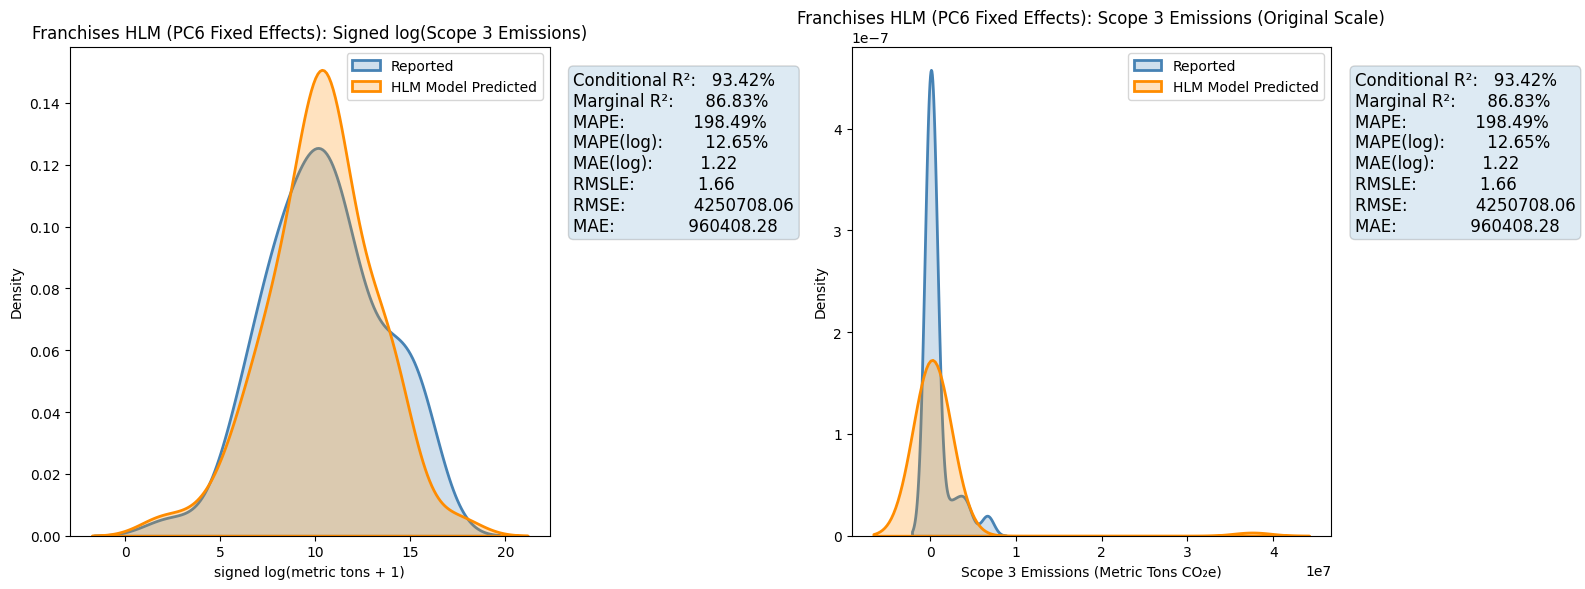

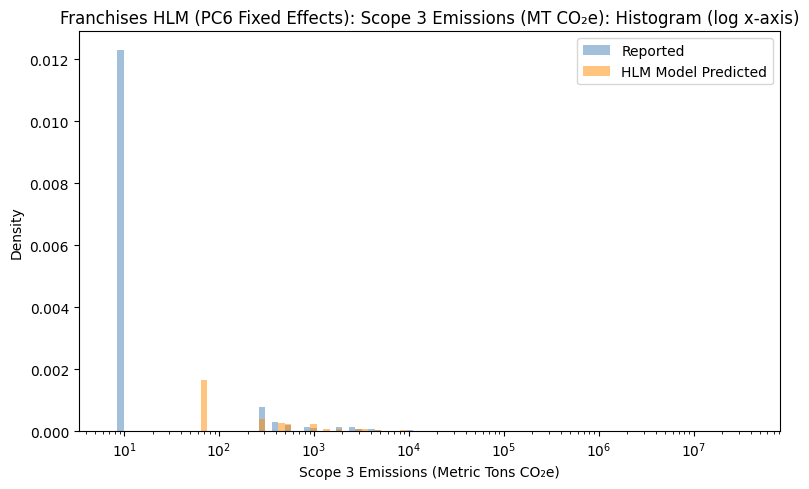

In [12]:
# Franchises HLM Model with PC6 Principal Components
# Robust to singular matrix errors due to constant, duplicate, or collinear features

import numpy as np
import pandas as pd
from patsy import dmatrix
import warnings

# 1. Filter for required columns only
feature_cols_PC6 = [f'PC6_{i}' for i in range(1, 7)]
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars = feature_cols_PC6 + [target_col] + cat_cols

train_df_PC6 = train_df.dropna(subset=all_model_vars).copy()
test_df_PC6 = test_df.dropna(subset=all_model_vars).copy()

# Only keep categorical levels present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC6[cat_col].unique())
    test_df_PC6 = test_df_PC6[test_df_PC6[cat_col].isin(train_cats)]

# --- 2. Drop constant and duplicate columns ---
def drop_constant_and_duplicate_cols(df, feature_cols):
    dropped = []
    # Constant columns
    for col in feature_cols:
        if df[col].std() < 1e-8:
            dropped.append((col, "constant"))
    feature_cols = [col for col in feature_cols if col not in [c for c, _ in dropped]]
    # Duplicate columns
    for i, col1 in enumerate(feature_cols):
        for col2 in feature_cols[i+1:]:
            if df[col1].equals(df[col2]):
                dropped.append((col2, f"duplicate of {col1}"))
                feature_cols = [col for col in feature_cols if col != col2]
    return feature_cols, dropped

feature_cols_PC6, dropped1 = drop_constant_and_duplicate_cols(train_df_PC6, feature_cols_PC6)

# --- 3. Drop perfectly collinear columns ---
def drop_perfect_collinear_cols(df, feature_cols):
    dropped = []
    if len(feature_cols) > 1:
        corr_matrix = df[feature_cols].corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        dupe_cols = [column for column in upper.columns if any(upper[column] == 1.0)]
        for col in dupe_cols:
            dropped.append((col, "perfectly collinear"))
        feature_cols = [col for col in feature_cols if col not in dupe_cols]
    return feature_cols, dropped

feature_cols_PC6, dropped2 = drop_perfect_collinear_cols(train_df_PC6, feature_cols_PC6)

dropped_cols_report = dropped1 + dropped2
if dropped_cols_report:
    print("\nDropped columns from predictors before fitting due to:")
    for col, reason in dropped_cols_report:
        print(f"  - {col}: {reason}")

# --- 4. Build formula and check design matrix rank ---
fixed_effects = ' + '.join(feature_cols_PC6) + ' + C(Countries) + C(Primary_activity) + Year'
formula = f'{target_col} ~ {fixed_effects}'

X_fe = dmatrix(formula.split("~")[1], train_df_PC6, return_type='dataframe')
rank = np.linalg.matrix_rank(X_fe.values)
print(f"Design matrix shape: {X_fe.shape}, rank: {rank}")
if rank < X_fe.shape[1]:
    print("WARNING: Design matrix is not full rank. Model may still fail. Consider dropping more features or combining rare categories.")

# --- 5. Fit model ---
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    md = smf.mixedlm(formula, data=train_df_PC6, groups=train_df_PC6['account_id'])
    try:
        mdf_PC6 = md.fit(reml=False)
        print(mdf_PC6.summary())
    except np.linalg.LinAlgError as e:
        print("ERROR: Model fitting failed due to singular matrix. Try removing additional predictors or simplifying the model.")
        mdf_PC6 = None

if mdf_PC6 is not None:
    # --- 6. Calculate conditional and marginal R² ---
    var_fixed = np.var(mdf_PC6.fittedvalues)
    var_resid = mdf_PC6.scale
    var_random = mdf_PC6.cov_re.iloc[0, 0] if mdf_PC6.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_PC6['predicted_log'] = mdf_PC6.predict(test_df_PC6)
    test_df_PC6['predicted'] = np.sign(test_df_PC6['predicted_log']) * (np.expm1(np.abs(test_df_PC6['predicted_log'])))

    # --- 8. Metrics ---
    y_true_log = test_df_PC6[target_col]
    y_pred_log = test_df_PC6['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC6['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nFranchises HLM with PC6 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC6.params,
        'pvalue': mdf_PC6.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Franchises HLM (PC6 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Franchises HLM (PC6 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Franchises HLM (PC6 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    PC6_model_metrics = {
        "Model": "HLM PC6",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC6),
        "# Obs (test)": len(test_df_PC6),
        "# Obs (train/test)": f"{len(train_df_PC6)}/{len(test_df_PC6)}"
    }

The PC6 HLM model did not converge.  Let's see how PC4 HLM performs.

## Franchises HLM Model with PC4 Principal Components (Singular Matrix Robust Version)

- Filters for required columns: PC4 principal components, signed-log target, and key categorical variables.
- Removes constant and duplicate columns from PC4 predictors.
- Drops perfectly collinear features.
- Reports any dropped columns and reasons.
- Checks design matrix rank before fitting; warns if not full rank.
- Fits hierarchical linear mixed-effects model (HLM) with only valid predictors.
- If fitting fails due to singular matrix, advises further feature reduction or category collapsing.
- Evaluates test set with R², error metrics, and feature coefficients.
- Visualizes predicted vs. reported values (log and original scale).
- Returns metrics dictionary for summary tables.

**How to use:**  
If the singular matrix error still occurs, reduce the number of predictors further, combine rare categorical levels, or review categorical encoding for issues.

Design matrix shape: (259, 59), rank: 57
                                  Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           slog_Scope_3_emissions_amount
No. Observations:            259               Method:                       ML                           
No. Groups:                  76                Scale:                        0.6708                       
Min. group size:             1                 Log-Likelihood:               -369.1121                    
Max. group size:             5                 Converged:                    No                           
Mean group size:             3.4                                                                          
----------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------

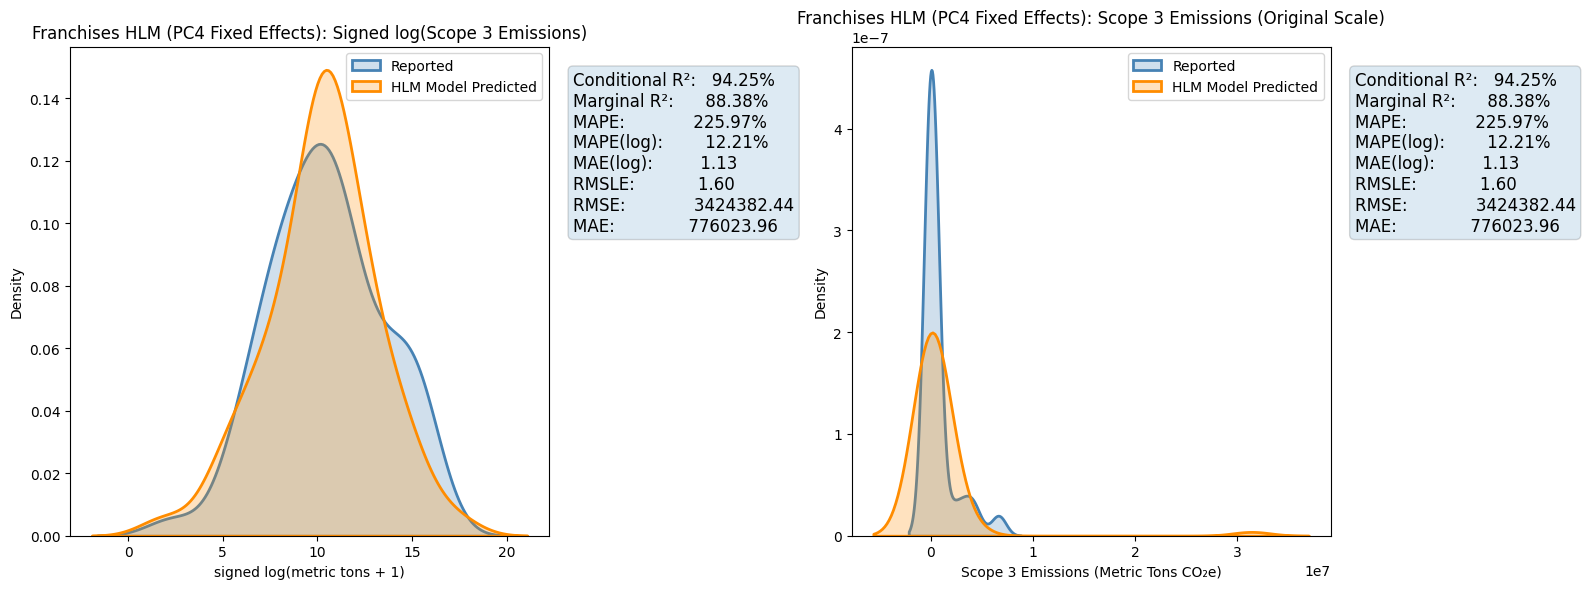

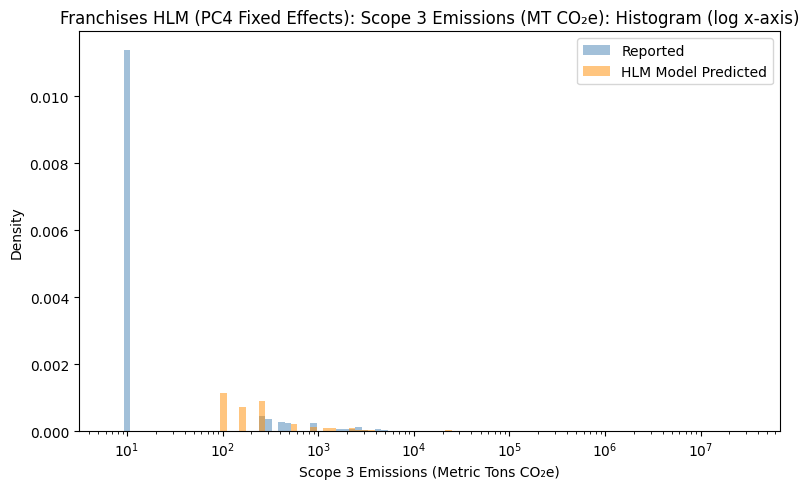

In [14]:
# Franchises HLM Model with PC4 Principal Components
# Robust to singular matrix errors due to constant, duplicate, or collinear features

# 1. Filter for required columns only
feature_cols_PC4 = [f'PC4_{i}' for i in range(1, 5)]
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars = feature_cols_PC4 + [target_col] + cat_cols

train_df_PC4 = train_df.dropna(subset=all_model_vars).copy()
test_df_PC4 = test_df.dropna(subset=all_model_vars).copy()

# Only keep categorical levels present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC4[cat_col].unique())
    test_df_PC4 = test_df_PC4[test_df_PC4[cat_col].isin(train_cats)]

# --- 2. Drop constant and duplicate columns ---
def drop_constant_and_duplicate_cols(df, feature_cols):
    dropped = []
    # Constant columns
    for col in feature_cols:
        if df[col].std() < 1e-8:
            dropped.append((col, "constant"))
    feature_cols = [col for col in feature_cols if col not in [c for c, _ in dropped]]
    # Duplicate columns
    for i, col1 in enumerate(feature_cols):
        for col2 in feature_cols[i+1:]:
            if df[col1].equals(df[col2]):
                dropped.append((col2, f"duplicate of {col1}"))
                feature_cols = [col for col in feature_cols if col != col2]
    return feature_cols, dropped

feature_cols_PC4, dropped1 = drop_constant_and_duplicate_cols(train_df_PC4, feature_cols_PC4)

# --- 3. Drop perfectly collinear columns ---
def drop_perfect_collinear_cols(df, feature_cols):
    dropped = []
    if len(feature_cols) > 1:
        corr_matrix = df[feature_cols].corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        dupe_cols = [column for column in upper.columns if any(upper[column] == 1.0)]
        for col in dupe_cols:
            dropped.append((col, "perfectly collinear"))
        feature_cols = [col for col in feature_cols if col not in dupe_cols]
    return feature_cols, dropped

feature_cols_PC4, dropped2 = drop_perfect_collinear_cols(train_df_PC4, feature_cols_PC4)

dropped_cols_report = dropped1 + dropped2
if dropped_cols_report:
    print("\nDropped columns from predictors before fitting due to:")
    for col, reason in dropped_cols_report:
        print(f"  - {col}: {reason}")

# --- 4. Build formula and check design matrix rank ---
fixed_effects = ' + '.join(feature_cols_PC4) + ' + C(Countries) + C(Primary_activity) + Year'
formula = f'{target_col} ~ {fixed_effects}'

X_fe = dmatrix(formula.split("~")[1], train_df_PC4, return_type='dataframe')
rank = np.linalg.matrix_rank(X_fe.values)
print(f"Design matrix shape: {X_fe.shape}, rank: {rank}")
if rank < X_fe.shape[1]:
    print("WARNING: Design matrix is not full rank. Model may still fail. Consider dropping more features or combining rare categories.")

# --- 5. Fit model ---
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    md = smf.mixedlm(formula, data=train_df_PC4, groups=train_df_PC4['account_id'])
    try:
        mdf_PC4 = md.fit(reml=False)
        print(mdf_PC4.summary())
    except np.linalg.LinAlgError as e:
        print("ERROR: Model fitting failed due to singular matrix. Try removing additional predictors or simplifying the model.")
        mdf_PC4 = None

if mdf_PC4 is not None:
    # --- 6. Calculate conditional and marginal R² ---
    var_fixed = np.var(mdf_PC4.fittedvalues)
    var_resid = mdf_PC4.scale
    var_random = mdf_PC4.cov_re.iloc[0, 0] if mdf_PC4.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- 7. Predict on test set ---
    test_df_PC4['predicted_log'] = mdf_PC4.predict(test_df_PC4)
    test_df_PC4['predicted'] = np.sign(test_df_PC4['predicted_log']) * (np.expm1(np.abs(test_df_PC4['predicted_log'])))

    # --- 8. Metrics ---
    y_true_log = test_df_PC4[target_col]
    y_pred_log = test_df_PC4['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC4['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nFranchises HLM with PC4 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- 9. Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_PC4.params,
        'pvalue': mdf_PC4.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- 10. Visualization ---
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Franchises HLM (PC4 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Franchises HLM (PC4 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Franchises HLM (PC4 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 11. RETURN METRICS FOR SUMMARY TABLE ---
    PC4_model_metrics = {
        "Model": "HLM PC4",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC4),
        "# Obs (test)": len(test_df_PC4),
        "# Obs (train/test)": f"{len(train_df_PC4)}/{len(test_df_PC4)}"
    }

PC4 HLM did not converge either.
Now I'll look into hierarchical clustering to determine if that may add value to increasing prediction accuracy.

## Appending Cluster Feature to Train and Test Sets (PC4 Clustering)

- Performs hierarchical clustering (Ward linkage) on standardized PC4 principal components.
- Finds the optimal number of clusters using silhouette score across cluster counts (2–30).
- Assigns cluster labels to all valid rows in `franchises_pca`.
- Appends the resulting 'Cluster' feature to both `train_df` and `test_df` using their indices.
- Prints distribution of cluster assignments in train and test sets.
- Allows downstream modeling to use the 'Cluster' feature as a categorical variable or for stratified analysis.

Optimal number of clusters (highest silhouette score): 3


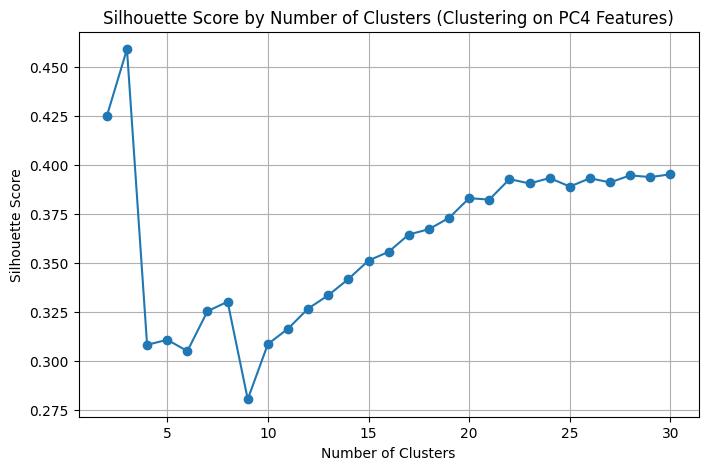

Number of observations in each cluster:
3    278
1     39
2     10
Name: count, dtype: int64


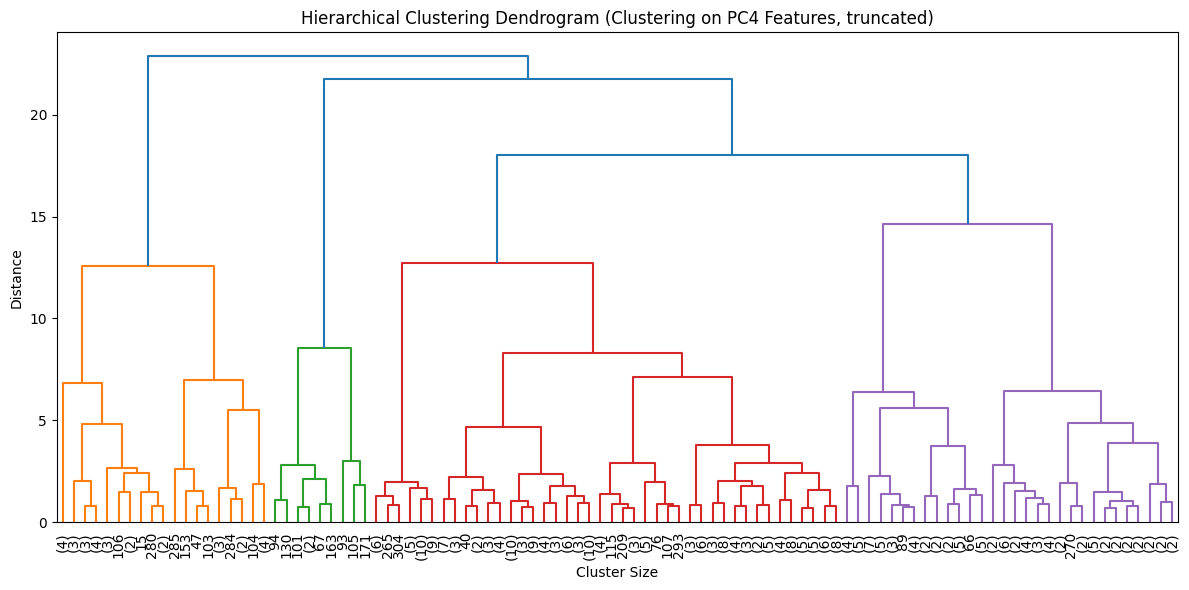

Train set cluster counts:
Cluster
3       218
<NA>     40
1        31
2        10
Name: count, dtype: Int64
Test set cluster counts:
Cluster
3       53
<NA>     9
1        7
Name: count, dtype: Int64


In [15]:
# --- STEP 1: Select PC4 PCA components for clustering ---
pc4_cols = [f'PC4_{i}' for i in range(1, 5)]
X_pc4 = franchises_pca[pc4_cols].dropna()
clust_indices = X_pc4.index

# --- STEP 2: Standardize the PC4 data ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc4)

# --- STEP 3: Hierarchical clustering (Ward linkage) ---
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score

Z = linkage(X_scaled, method='ward')

# --- STEP 4: Find optimal number of clusters using silhouette score ---
range_n_clusters = range(2, 31)
sil_scores = []
for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# --- Plot silhouette scores ---
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC4 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# --- STEP 5: Assign optimal cluster labels ---
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# --- STEP 6: Append cluster labels back to original DataFrame (only for valid rows) ---
franchises_pca_clusters = franchises_pca.copy()
franchises_pca_clusters['Cluster'] = np.nan
franchises_pca_clusters.loc[clust_indices, 'Cluster'] = labels_optimal

# --- Print cluster counts ---
print("Number of observations in each cluster:")
print(pd.Series(labels_optimal).value_counts())

# --- Optionally plot dendrogram (subset for readability) ---
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC4 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 7: Append 'Cluster' feature to train and test sets ---
train_df = train_df.copy()
test_df = test_df.copy()

train_df['Cluster'] = franchises_pca_clusters.loc[train_df.index, 'Cluster'].astype('Int64')
test_df['Cluster'] = franchises_pca_clusters.loc[test_df.index, 'Cluster'].astype('Int64')

# --- Print cluster distribution in train and test sets ---
print("Train set cluster counts:")
print(train_df['Cluster'].value_counts(dropna=False))

print("Test set cluster counts:")
print(test_df['Cluster'].value_counts(dropna=False))

In [16]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 298
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   299 non-null    object 
 1   account_id                     299 non-null    int64  
 2   Year                           299 non-null    int64  
 3   Countries                      299 non-null    object 
 4   Primary_activity               299 non-null    object 
 5   Primary_sector                 299 non-null    object 
 6   Market_Cap_USD                 260 non-null    float64
 7   Revenue_USD                    261 non-null    float64
 8   ebitda_USD                     261 non-null    float64
 9   grossProfit_USD                261 non-null    float64
 10  netIncome_USD                  261 non-null    float64
 11  cashAndCashEquivalents_USD     261 non-null    float64
 12  shortTermInvestments_USD       261 non-null    float64


## HLM Model: PC4 + Cluster (Singular Matrix Robust Version, TypeError Fixed)

- Skips constant/duplicate/collinear checks for categorical columns (like `'Cluster'`).
- Only screens numeric predictors for constant, duplicate, or collinear features.
- Prints summary of any dropped numeric columns.
- Checks design matrix rank before fitting and warns if it is not full rank.
- If the singular matrix error persists, remove additional predictors or rare categories.

**Tip:**  
Always ensure categorical codes (e.g., `'Cluster'`) are treated as strings or categories for modeling, and only numeric columns are screened for statistical redundancy.

In [21]:
import numpy as np
from patsy import dmatrix

def drop_constant_and_duplicate_cols(df, feature_cols):
    dropped = []
    numeric_cols = df[feature_cols].select_dtypes(include=[np.number]).columns
    # Constant columns: only check numeric columns
    for col in numeric_cols:
        if df[col].std() < 1e-8:
            dropped.append((col, "constant"))
    feature_cols = [col for col in feature_cols if col not in [c for c, _ in dropped]]
    # Duplicate columns: only check numeric columns
    for i, col1 in enumerate(numeric_cols):
        for col2 in numeric_cols[i+1:]:
            if df[col1].equals(df[col2]):
                dropped.append((col2, f"duplicate of {col1}"))
                feature_cols = [col for col in feature_cols if col != col2]
    return feature_cols, dropped

def drop_perfect_collinear_cols(df, feature_cols):
    dropped = []
    numeric_cols = df[feature_cols].select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        corr_matrix = df[numeric_cols].corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        dupe_cols = [column for column in upper.columns if any(upper[column] == 1.0)]
        for col in dupe_cols:
            dropped.append((col, "perfectly collinear"))
        feature_cols = [col for col in feature_cols if col not in dupe_cols]
    return feature_cols, dropped

# --- Ensure 'Cluster' is string/categorical for modeling ---
train_df_pc4c['Cluster'] = train_df_pc4c['Cluster'].astype(str)
test_df_pc4c['Cluster'] = test_df_pc4c['Cluster'].astype(str)

# --- Drop problematic predictors (skip constant/duplicate check for 'Cluster') ---
feature_cols_pc4_cluster = [f'PC4_{i}' for i in range(1, 5)] + ['Cluster']
feature_cols_pc4_cluster, dropped1 = drop_constant_and_duplicate_cols(train_df_pc4c, feature_cols_pc4_cluster)
feature_cols_pc4_cluster, dropped2 = drop_perfect_collinear_cols(train_df_pc4c, feature_cols_pc4_cluster)
dropped_cols_report = dropped1 + dropped2
if dropped_cols_report:
    print("\nDropped columns from predictors before fitting due to:")
    for col, reason in dropped_cols_report:
        print(f"  - {col}: {reason}")

fixed_effects = (
    ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc4_cluster]) +
    ' + C(Countries) + C(Primary_activity) + Year'
)
formula = f'{target_col} ~ {fixed_effects}'

# --- Check matrix rank before fitting ---
X_fe = dmatrix(formula.split("~")[1], train_df_pc4c, return_type='dataframe')
rank = np.linalg.matrix_rank(X_fe.values)
print(f"Design matrix shape: {X_fe.shape}, rank: {rank}")
if rank < X_fe.shape[1]:
    print("WARNING: Design matrix is not full rank. Model may still fail. Consider dropping more features or combining rare categories.")

# --- Fit model only if full rank ---
import warnings
import statsmodels.formula.api as smf

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    try:
        md = smf.mixedlm(formula, data=train_df_pc4c, groups=train_df_pc4c['account_id'])
        mdf_pc4c = md.fit(reml=False)
        print(mdf_pc4c.summary())
    except np.linalg.LinAlgError as e:
        print("ERROR: Model fitting failed due to singular matrix. Try removing additional predictors or simplifying the model further.")

Design matrix shape: (259, 61), rank: 59
ERROR: Model fitting failed due to singular matrix. Try removing additional predictors or simplifying the model further.


Model failed even after fixes applied for singular matrix.

## Metrics Table

In [22]:
# --- Dynamically collect available model metrics for Franchises PCA HLM models (PC8, PC6, PC4, and Cluster) ---

# List your model metric variable names, train/test splits, fit objects, and PCA objects
model_metric_names = [
    ("PC8_model_metrics",        "train_df_PC8",     "test_df_PC8",     "mdf_PC8",     "pca8"),
    ("PC6_model_metrics",        "train_df_PC6",     "test_df_PC6",     "mdf_PC6",     "pca6"),
    ("PC4_model_metrics",        "train_df_PC4",     "test_df_PC4",     "mdf_PC4",     "pca4"),
    ("pc4_cluster_model_metrics","train_df_pc4c",    "test_df_pc4c",    "mdf_pc4c",    "pca4"),
]

metrics_dicts = []
trains = []
tests = []
fits = []
explained_vars = []

for metric_name, train_name, test_name, fit_name, pca_name in model_metric_names:
    if (metric_name in globals() and
        train_name in globals() and
        test_name in globals() and
        fit_name in globals() and
        pca_name in globals()):
        metrics_dicts.append(globals()[metric_name])
        trains.append(globals()[train_name])
        tests.append(globals()[test_name])
        fits.append(globals()[fit_name])
        explained_vars.append(sum(getattr(globals()[pca_name], "explained_variance_ratio_", [np.nan])))

# --- Attach observation counts, convergence status, and explained variance to each dictionary ---
for metrics, train, test, fit_result, explained_var in zip(
        metrics_dicts, trains, tests, fits, explained_vars):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"
    metrics["Converged"] = "Yes" if getattr(fit_result, "converged", False) else "No"
    metrics["PC Explained Variance"] = explained_var

# --- Add a new row for your "Optimized" model ---
optimized_row = {
    "Model": "Optimized Franchises HLM",
    "Conditional_R2": 0.9429,
    "Marginal_R2": 0.8842,
    "RMSE": 2845271.54,
    "MAE": 732099.35,
    "MAE_log": 1.03,
    "RMSLE": 1.4,
    "MAPE": 257.29,
    "# Obs (train/test)": "259/56",
    "PC Explained Variance": np.nan,
    "Converged": "Yes"
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# --- Order columns for summary ---
desired_order = [
    "Model", "PC Explained Variance", "Conditional_R2", "Marginal_R2",
    "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)", "Converged"
]

if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = np.nan

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# --- Format for display ---
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = (metrics_df_display["Conditional_R2"].astype(float) * 100).map("{:.2f}%".format)
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = (metrics_df_display["Marginal_R2"].astype(float) * 100).map("{:.2f}%".format)
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "PC Explained Variance"]:
    if col in metrics_df_display.columns:
        if col == "PC Explained Variance":
            metrics_df_display[col] = metrics_df_display[col].apply(lambda v: "{:.2%}".format(v) if pd.notnull(v) else "")
        else:
            metrics_df_display[col] = metrics_df_display[col].astype(float).map("{:.2f}".format)

# --- Display in notebook or print ---
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,PC Explained Variance,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test),Converged
0,HLM PC6,83.80%,93.42%,86.83%,4250708.06,960408.28,1.22,1.66,198.49,259/57,No
1,HLM PC4,72.41%,94.25%,88.38%,3424382.44,776023.96,1.13,1.60,225.97,259/57,No
2,Optimized Franchises HLM,,94.29%,88.42%,2845271.54,732099.35,1.03,1.40,257.29,259/56,Yes
